In [ ]:
#RAG Объединение регионов

In [1]:
%matplotlib inline


# RAG Thresholding

В этом примере строится граф смежности регионов (RAG) и объединяются регионы
которые похожи по цвету. Мы создаем лоскут и определяем края как
разницу в среднем цвете. Затем мы объединяем области с похожим средним цветом.



In [10]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt


Для начала мы выделяем labels1 (Целочисленную маску, указывающая метки сегментов), далее в g записываем граф смежности регионов. В labels2 записываем результат применения функции cut_treshold - объединения областей, разделенные весом, меньшим порогового значения. И результирующую картинку преобразуем в rgb и записываем в out2 переменную.   


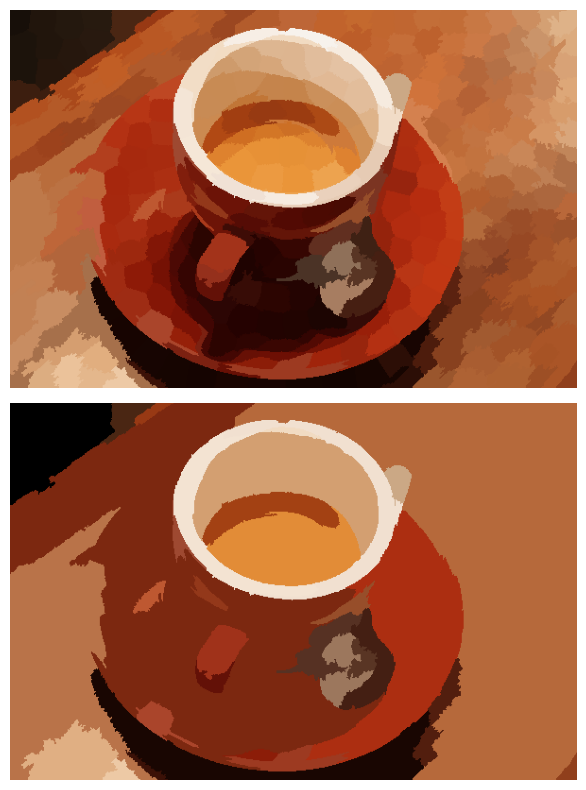

In [20]:
img = data.coffee()

labels1 = segmentation.slic(img, compactness=10, n_segments=400, start_label=1)
# print(labels1[0])
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
# print(out1)
g = graph.rag_mean_color(img, labels1)
# print(g)
labels2 = graph.cut_threshold(labels1, g, 29)
# print(labels2)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)
# print(out2)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True,
                       figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()